In [3]:
##数据预处理 将时间格式化 并把CSV文件转为 dataFrame
import csv
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)

def changeDateFormat(df):
    # Oneliner to convert the UNIX timestamp to readable format
    func = lambda x: datetime.utcfromtimestamp(int(x)/1000).strftime('%Y-%m-%d %H:%M:%S')
    # Exchanging the timestamps
    df['date'] = df['date'].apply(func)
    return df

data = pd.read_csv('Syn.csv')

C:\Users\yue\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
y = data.loc[:,data.columns == " Label"]

C:\Users\yue\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 Label
BENIGN      35790
Syn       4284751
dtype: int64


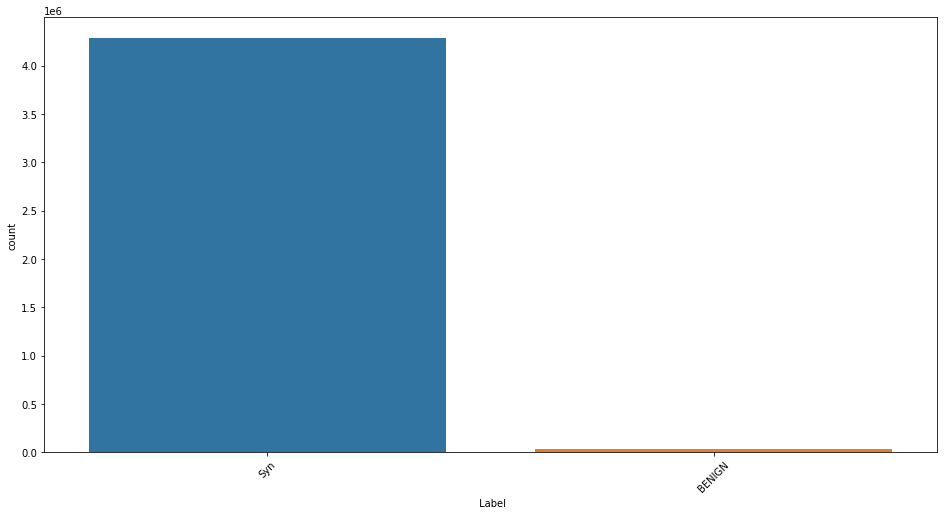

In [5]:
import seaborn as sns
def ClassDistribution(y):
    ax = sns.countplot(y[' Label'],label="Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    print(y.groupby(' Label').size())

ClassDistribution(y)

In [6]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,445444,172.16.0.5-192.168.50.4-9429-9429-6,172.16.0.5,9429,192.168.50.4,9429,6,2018-11-03 11:36:28.607338,36063894,7,...,29.444864,52.0,1.0,1.202128e+07,6.253623e+06,18628035.0,6193840.0,0,1,Syn
1,113842,172.16.0.5-192.168.50.4-60224-60224-6,172.16.0.5,60224,192.168.50.4,60224,6,2018-11-03 11:36:28.607339,44851366,8,...,0.000000,1.0,1.0,2.066268e+07,1.169783e+07,28934293.0,12391060.0,0,1,Syn
2,176377,172.16.0.5-192.168.50.4-33827-11746-6,192.168.50.4,11746,172.16.0.5,33827,6,2018-11-03 11:36:28.607388,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,Syn
3,24777,172.16.0.5-192.168.50.4-33828-1431-6,172.16.0.5,33828,192.168.50.4,1431,6,2018-11-03 11:36:28.607391,0,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
4,85100,172.16.0.5-192.168.50.4-5311-5311-6,172.16.0.5,5311,192.168.50.4,5311,6,2018-11-03 11:36:28.607442,35731470,8,...,33.234019,48.0,1.0,1.191047e+07,1.849493e+06,13693985.0,10001398.0,0,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320536,317398,192.168.50.9-31.13.80.36-44304-443-6,192.168.50.9,44304,31.13.80.36,443,6,2018-11-03 12:37:00.711502,407677,88,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
4320537,286894,192.168.50.8-8.8.8.8-60481-53-17,192.168.50.8,60481,8.8.8.8,53,17,2018-11-03 12:37:00.730301,45201,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN
4320538,2665,192.168.50.9-31.13.80.12-46518-443-6,31.13.80.12,443,192.168.50.9,46518,6,2018-11-03 12:37:00.788605,182,1,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,BENIGN
4320539,2666,192.168.50.9-31.13.80.12-46518-443-6,192.168.50.9,46518,31.13.80.12,443,6,2018-11-03 12:37:00.788788,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,BENIGN


In [7]:
# 定义数据集中的关键特征，如目标端口、传输时间、总发送包数、总接受包数
imp = [' Timestamp', 'Flow ID', ' Source Port', ' Destination Port', ' Flow Duration', ' Total Fwd Packets',' Total Backward Packets', 'Flow Bytes/s',' Flow Packets/s', ' Bwd Packets/s', ' Label']

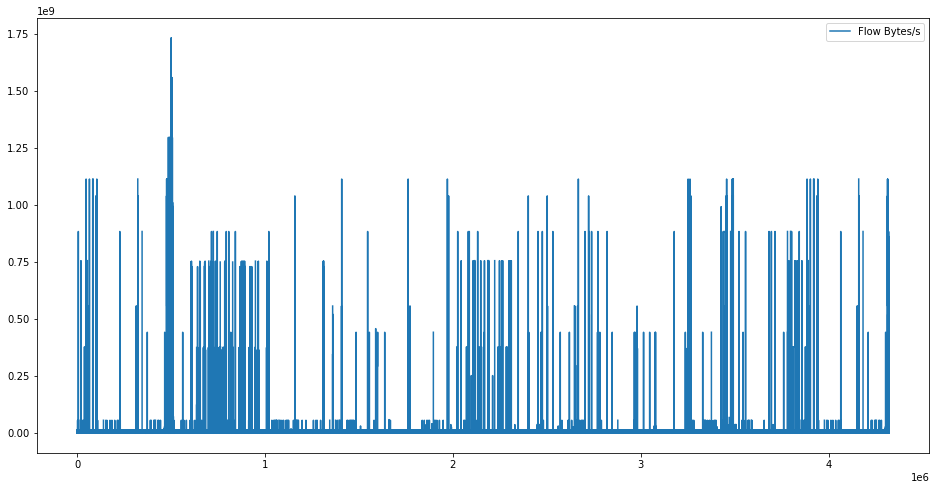

In [8]:
data['Flow Bytes/s'].plot(label='Flow Bytes/s')
x = [0, len(data)]
plt.legend()

In [9]:
normol = data[imp][data[' Label'] == 'BENIGN']

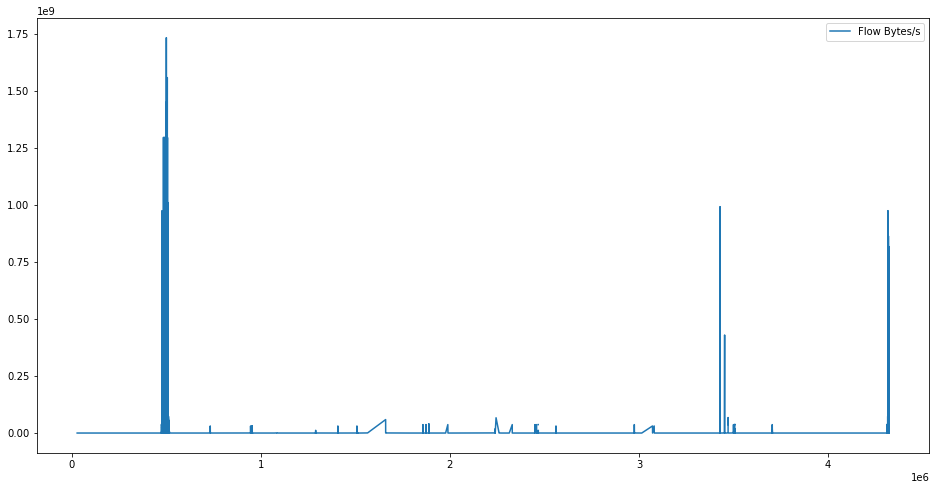

In [10]:
normol['Flow Bytes/s'].plot(label='Flow Bytes/s')
plt.legend()

In [11]:
dos = data[imp][data[' Label'] == 'Syn']

C:\Users\yue\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


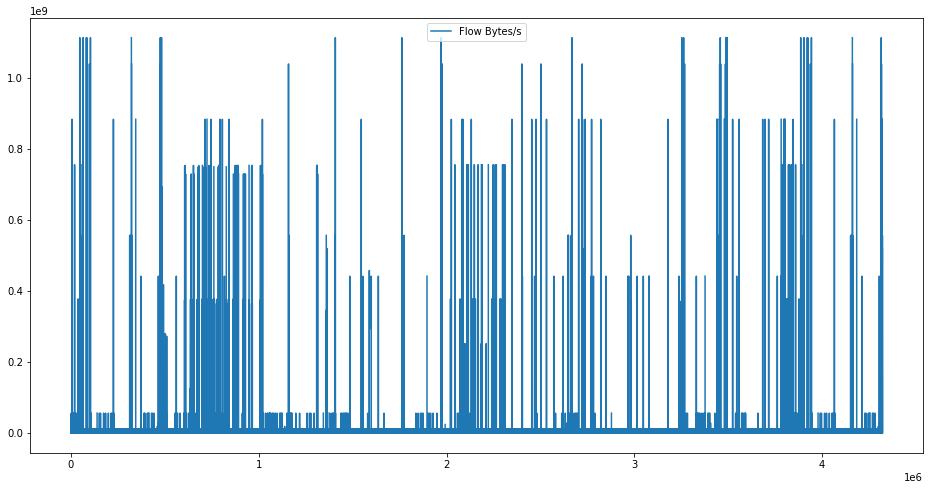

In [12]:
dos['Flow Bytes/s'].plot(label='Flow Bytes/s')
plt.legend()

In [13]:
dos

,Timestamp,Flow ID,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,Bwd Packets/s,Label
0,2018-11-03 11:36:28.607338,172.16.0.5-192.168.50.4-9429-9429-6,9429,9429,36063894,7,2,1.497342e+00,2.495571e-01,0.055457,Syn
1,2018-11-03 11:36:28.607339,172.16.0.5-192.168.50.4-60224-60224-6,60224,60224,44851366,8,4,1.605302e+00,2.675504e-01,0.089183,Syn
2,2018-11-03 11:36:28.607388,172.16.0.5-192.168.50.4-33827-11746-6,11746,33827,1,2,0,1.200000e+07,2.000000e+06,0.000000,Syn
3,2018-11-03 11:36:28.607391,172.16.0.5-192.168.50.4-33828-1431-6,33828,1431,0,2,0,inf,inf,0.000000,Syn
4,2018-11-03 11:36:28.607442,172.16.0.5-192.168.50.4-5311-5311-6,5311,5311,35731470,8,2,1.679192e+00,2.798653e-01,0.055973,Syn
...,...,...,...,...,...,...,...,...,...,...,...
4320361,2018-11-03 12:36:34.450244,172.16.0.5-192.168.50.4-59600-61850-17,61850,59600,2,2,0,5.200000e+08,1.000000e+06,0.000000,Syn
4320362,2018-11-03 12:36:34.666333,172.16.0.5-192.168.50.4-61850-65008-17,61850,65008,4,2,0,2.785000e+08,5.000000e+05,0.000000,Syn
4320363,2018-11-03 12:36:42.452183,172.16.0.5-192.168.50.4-55234-22-6,55234,22,16376043,34,46,5.720552e+02,4.885185e+00,2.808981,Syn
4320364,2018-11-03 12:36:42.457174,172.16.0.5-192.168.50.4-35796-22-6,35796,22,1450,1,3,0.000000e+00,2.758621e+03,2068.965517,Syn


In [14]:
normol

,Timestamp,Flow ID,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,Bwd Packets/s,Label
29300,2018-11-03 11:36:30.766872,172.217.11.10-192.168.50.6-443-56122-6,56122,443,111695142,12,6,4.771917e+00,1.611529e-01,0.053718,BENIGN
42766,2018-11-03 11:36:31.766957,172.217.9.225-192.168.50.6-443-56142-6,56142,443,111710871,12,6,4.771246e+00,1.611302e-01,0.053710,BENIGN
42768,2018-11-03 11:36:31.767006,172.217.10.226-192.168.50.6-443-56123-6,56123,443,111711024,12,6,4.771239e+00,1.611300e-01,0.053710,BENIGN
56347,2018-11-03 11:36:32.782636,172.217.12.194-192.168.50.6-443-56147-6,56147,443,111695541,12,6,4.771900e+00,1.611524e-01,0.053717,BENIGN
56349,2018-11-03 11:36:32.782688,172.217.6.227-192.168.50.6-443-56149-6,56149,443,111695685,12,6,4.771894e+00,1.611522e-01,0.053717,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...
4320536,2018-11-03 12:37:00.711502,192.168.50.9-31.13.80.36-44304-443-6,44304,443,407677,88,151,5.276677e+05,5.862484e+02,370.391266,BENIGN
4320537,2018-11-03 12:37:00.730301,192.168.50.8-8.8.8.8-60481-53-17,60481,53,45201,2,2,1.265459e+04,8.849362e+01,44.246809,BENIGN
4320538,2018-11-03 12:37:00.788605,192.168.50.9-31.13.80.12-46518-443-6,443,46518,182,1,4,1.318681e+05,2.747253e+04,21978.021978,BENIGN
4320539,2018-11-03 12:37:00.788788,192.168.50.9-31.13.80.12-46518-443-6,46518,443,1,2,0,2.400000e+07,2.000000e+06,0.000000,BENIGN


In [15]:
data.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [16]:
# 定义数据集中的关键特征，如目标端口、传输时间、总发送包数、总接受包数
imp = [' Timestamp',' Total Fwd Packets',' Total Backward Packets',' Label']

In [37]:
data_00 = data[imp][data[' Destination Port'] == 443]
#data_00['DeliveryRate'] = (data_00[' Total Fwd Packets'] - data_00[' Total Backward Packets'])/data_00[' Total Fwd Packets']
#data_00 = data_00[data_00['DeliveryRate'] > 0]
data_00.to_csv('./Flow_Bytes.csv', index=False)

In [18]:
data_00

,Timestamp,Total Fwd Packets,Total Backward Packets,Label,DeliveryRate
29300,2018-11-03 11:36:30.766872,12,6,BENIGN,0.500000
42766,2018-11-03 11:36:31.766957,12,6,BENIGN,0.500000
42768,2018-11-03 11:36:31.767006,12,6,BENIGN,0.500000
56347,2018-11-03 11:36:32.782636,12,6,BENIGN,0.500000
56349,2018-11-03 11:36:32.782688,12,6,BENIGN,0.500000
...,...,...,...,...,...
4320501,2018-11-03 12:37:00.092320,16,12,BENIGN,0.250000
4320510,2018-11-03 12:37:00.202225,2,0,BENIGN,1.000000
4320515,2018-11-03 12:37:00.326304,19,12,BENIGN,0.368421
4320516,2018-11-03 12:37:00.334303,16,15,BENIGN,0.062500


In [19]:
data_10 = data_00[1000:]

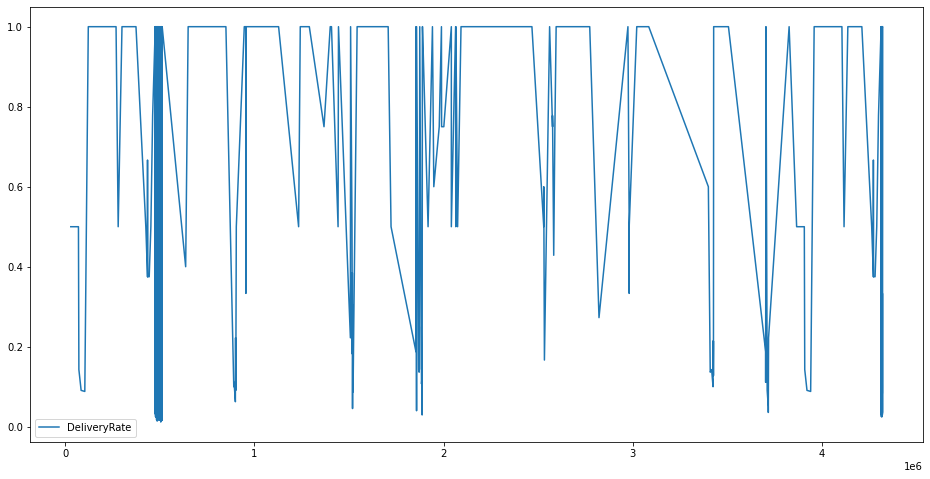

In [20]:
data_00['DeliveryRate'].plot(label='DeliveryRate')
plt.legend()

In [21]:
# 定义数据集中的关键特征，如目标端口、传输时间、总发送包数、总接受包数
imp = [' Timestamp', ' Source Port', ' Destination Port', ' Flow Duration', ' Total Fwd Packets',' Total Backward Packets', 'Flow Bytes/s',' Flow Packets/s', ' Bwd Packets/s', ' Label']

In [22]:
data_01 = data[imp][data[' Destination Port'] == 443]

In [23]:
data_01

,Timestamp,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,Bwd Packets/s,Label
29300,2018-11-03 11:36:30.766872,56122,443,111695142,12,6,4.771917e+00,1.611529e-01,0.053718,BENIGN
42766,2018-11-03 11:36:31.766957,56142,443,111710871,12,6,4.771246e+00,1.611302e-01,0.053710,BENIGN
42768,2018-11-03 11:36:31.767006,56123,443,111711024,12,6,4.771239e+00,1.611300e-01,0.053710,BENIGN
56347,2018-11-03 11:36:32.782636,56147,443,111695541,12,6,4.771900e+00,1.611524e-01,0.053717,BENIGN
56349,2018-11-03 11:36:32.782688,56149,443,111695685,12,6,4.771894e+00,1.611522e-01,0.053717,BENIGN
...,...,...,...,...,...,...,...,...,...,...
4320518,2018-11-03 12:37:00.412605,46514,443,26,1,3,3.692308e+06,1.538462e+05,115384.615385,BENIGN
4320528,2018-11-03 12:37:00.578998,39558,443,34378,1,2,0.000000e+00,8.726511e+01,58.176741,BENIGN
4320535,2018-11-03 12:37:00.703971,46518,443,84633,14,15,1.021351e+05,3.426559e+02,177.235830,BENIGN
4320536,2018-11-03 12:37:00.711502,44304,443,407677,88,151,5.276677e+05,5.862484e+02,370.391266,BENIGN


In [24]:
y = data_01.loc[:,data_01.columns == " Label"]

In [25]:
data_01['Flow Bytes/s'] = data_01['Flow Bytes/s']/10**8

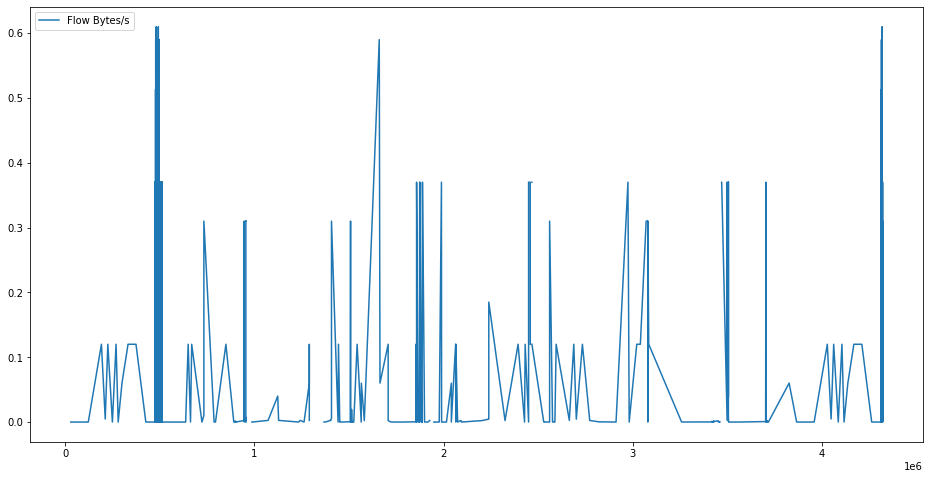

In [26]:
data_01['Flow Bytes/s'].plot(label='Flow Bytes/s')
plt.legend()

C:\Users\yue\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 Label
BENIGN    13107
Syn          70
dtype: int64


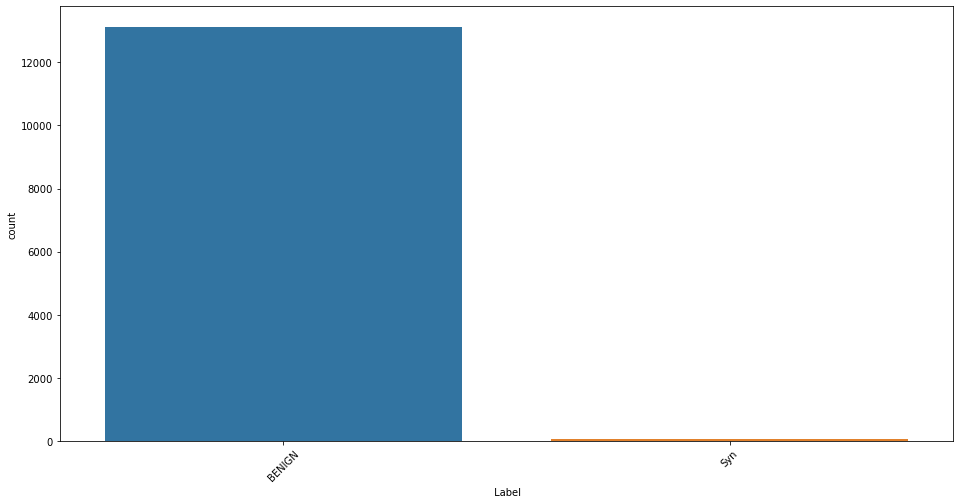

In [27]:
ClassDistribution(y)

In [28]:
data_02 = data[imp][data['Flow ID'] == '192.168.50.9-31.13.80.36-44304-443-6']

In [29]:
data_02

,Timestamp,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,Bwd Packets/s,Label
482794,2018-11-03 12:37:00.711502,44304,443,407677,88,151,527667.736958,586.248427,370.391266,BENIGN
482799,2018-11-03 12:37:01.119182,443,44304,46642072,39,19,1330.215347,1.243513,0.407358,BENIGN
482935,2018-11-03 12:37:47.761260,44304,443,26613,1,1,0.000000,75.151242,37.575621,BENIGN
482946,2018-11-03 12:37:47.787875,443,44304,70,1,2,0.000000,42857.142857,28571.428571,BENIGN
4320536,2018-11-03 12:37:00.711502,44304,443,407677,88,151,527667.736958,586.248427,370.391266,BENIGN


In [30]:
data_02 = data_02.dropna()

In [31]:
data_02

,Timestamp,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,Bwd Packets/s,Label
482794,2018-11-03 12:37:00.711502,44304,443,407677,88,151,527667.736958,586.248427,370.391266,BENIGN
482799,2018-11-03 12:37:01.119182,443,44304,46642072,39,19,1330.215347,1.243513,0.407358,BENIGN
482935,2018-11-03 12:37:47.761260,44304,443,26613,1,1,0.000000,75.151242,37.575621,BENIGN
482946,2018-11-03 12:37:47.787875,443,44304,70,1,2,0.000000,42857.142857,28571.428571,BENIGN
4320536,2018-11-03 12:37:00.711502,44304,443,407677,88,151,527667.736958,586.248427,370.391266,BENIGN


In [32]:
data_02.to_csv('./TotalFwdPackets.csv', index=False)

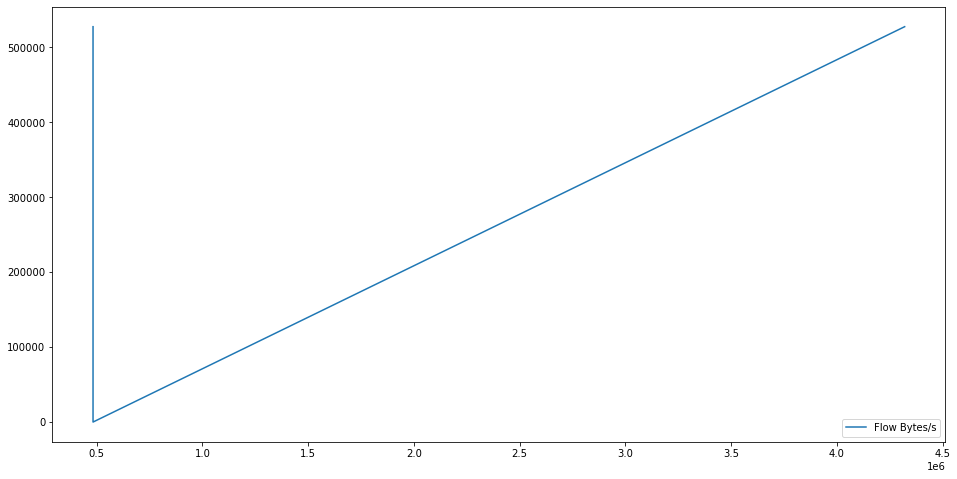

In [33]:
data_02['Flow Bytes/s'].plot(label='Flow Bytes/s')
plt.legend()

In [34]:
data_02.head(10)

,Timestamp,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,Bwd Packets/s,Label
482794,2018-11-03 12:37:00.711502,44304,443,407677,88,151,527667.736958,586.248427,370.391266,BENIGN
482799,2018-11-03 12:37:01.119182,443,44304,46642072,39,19,1330.215347,1.243513,0.407358,BENIGN
482935,2018-11-03 12:37:47.761260,44304,443,26613,1,1,0.000000,75.151242,37.575621,BENIGN
482946,2018-11-03 12:37:47.787875,443,44304,70,1,2,0.000000,42857.142857,28571.428571,BENIGN
4320536,2018-11-03 12:37:00.711502,44304,443,407677,88,151,527667.736958,586.248427,370.391266,BENIGN


In [35]:
data_02.describe()

,Source Port,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Flow Bytes/s,Flow Packets/s,Bwd Packets/s
count,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000
mean,26759.600000,17987.400000,9.496822e+06,43.400000,64.800000,211333.137853,8821.206893,5870.038816
std,24023.659095,24023.659095,2.076576e+07,43.569485,79.013923,288773.170046,19028.657745,12691.685699
min,443.000000,443.000000,7.000000e+01,1.000000,1.000000,0.000000,1.243513,0.407358
25%,443.000000,443.000000,2.661300e+04,1.000000,2.000000,0.000000,75.151242,37.575621
50%,44304.000000,443.000000,4.076770e+05,39.000000,19.000000,1330.215347,586.248427,370.391266
75%,44304.000000,44304.000000,4.076770e+05,88.000000,151.000000,527667.736958,586.248427,370.391266
max,44304.000000,44304.000000,4.664207e+07,88.000000,151.000000,527667.736958,42857.142857,28571.428571


In [36]:
#去除无效数据
